# Proyecto final: Bases de datos sintéticas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importar base de datos entregada
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/4.a Analisis Diferencial/adult_with_pii.txt', sep=',')
df

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


En esta tarea indagaremos sobre cómo obtener bases de datos sintéticas y diferencialmente-privadas a partir de bases de datos reales.

La idea es tomar una base de datos $S$ y trabajar sobre ella para obtener una nueva base de datos $D$ que tenga la misma forma que $S$ (es decir, la misma cantidad de atributos y usuarios que $S$), que sea un objeto diferencialmente-privado (con respecto a $S$) y que, además, tenga las *mismas* propiedades que la base de datos $S$. Con esto último queremos decir que si, por ejemplo, tomamos la base de datos del censo, queremos que la distribución de las edades de la base de datos $S$ sea similar a la distribución de las edades de la base de datos $D$.

# Primera parte  (20%)

1. Importe la base de datos entregada y deje solo la columna correspondiente a las edades (Age). Llame age_data a esta base de datos.
2. Cree una lista, llamada synth_rep, de 101 elementos donde el i-ésimo elemento (i comienza en 0) de ella corresponda a la cantidad de personas en la base de datos con la edad i. Es decir, la lista debería verse algo así:

$$\text{synth_rep} = [\text{¿Cuántas personas tienen 0 años?, ¿Cuántas personas tienen 1 año?, ... , ¿Cuántas personas tienen 100 años?}] $$

3. synth_rep puede pensarse como una consulta vectorial. Justifique por qué la 1-sensibilidad de esta consulta es 1.
**Observación:** Las distintas consultas en synth_rep son 'disjuntas' en el siguiente sentido: Una determinada persona solo puede modificar uno de los contadores, pues solo tiene una edad.

4. Privatice synth_rep usando el mecanismo Laplaciano con $\varepsilon=1$. Llame dp_synth_rep a este objeto.

5. Haga un gráfico de barras con ambas consultas: synth_rep y dp_synth_rep. Las casillas en el gráfico de barras corresponderán a las edades de 0 a 100.

**Respuesta**

**Punto 1:**

In [4]:
age_data = df[['Age']]


**Punto 2:**

In [5]:
age_counts = age_data['Age'].value_counts().sort_index()

synth_rep = []
for i in range(101):
    if i in age_counts.index:
        synth_rep.append(age_counts[i])
    else:
        synth_rep.append(0)

synth_rep

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 395,
 550,
 712,
 753,
 720,
 765,
 877,
 798,
 841,
 785,
 835,
 867,
 813,
 861,
 888,
 828,
 875,
 886,
 876,
 898,
 858,
 827,
 816,
 794,
 808,
 780,
 770,
 724,
 734,
 737,
 708,
 543,
 577,
 602,
 595,
 478,
 464,
 415,
 419,
 366,
 358,
 366,
 355,
 312,
 300,
 258,
 230,
 208,
 178,
 150,
 151,
 120,
 108,
 89,
 72,
 67,
 64,
 51,
 45,
 46,
 29,
 23,
 22,
 22,
 20,
 12,
 6,
 10,
 3,
 1,
 1,
 3,
 0,
 43,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

**Punto 3:**

Este ejercicio corresponde a un tipo de consulta denominado *histogram query*. Si bien resulta similar al ejemplo de consultas de conteo, una persona aquí no puede tener más de una edad. Nuestra función $f$ será ($f0, f1, . . . , fk−1$), donde $fi$ pregunta cuántas personas tienen $i$ años. No es difícil argumentar que la '1-sensibilidad' de esta función es 2: cambiando
la edad de cualquier individuo resultaría en el decrecimiento de una cuenta (de un bin) y el aumento de otro. La sensibilidad de esta función es 2 porque el histograma puede cambiar como máximo 2 bins si se agrega o elimina un solo registro. 

Por ejemplo, si el histograma muestra que hay 10 personas en el rango de edad 0-10, y agregamos un registro de alguien que tiene 10 años, el conteo en el bin 0-10 aumentará en 1, y el conteo en el intervalo 10-20 aumentará en 1. El cambio total en el histograma es 2.

De manera similar, si eliminamos un registro de alguien que tiene 10 años, el recuento en el intervalo 0-10 disminuirá en 1 y el recuento en el intervalo 10-20 disminuirá en 1. El cambio total en el histograma es 2 .

La sensibilidad de una función de valor vectorial es importante porque determina la cantidad de ruido que debe agregarse a la salida de la función para proteger la privacidad de las personas en el conjunto de datos. Cuanto mayor sea la sensibilidad, más ruido se debe agregar.

En el caso de un histograma con 100 contenedores, la sensibilidad es 2, por lo que la cantidad de ruido que debe agregarse a la salida del histograma es 2ε, donde ε es el parámetro de privacidad.

**Punto 4:**

In [6]:
#Primero definimos el mecanismo laplaciano

rng = np.random.default_rng()

def laplace_mech(statistic, sensitivity, epsilon):
  return statistic + rng.laplace(loc=0, scale=sensitivity/epsilon)

In [7]:
epsilon = 1
dp_syn_rep = [laplace_mech(c, 2, epsilon) for c in synth_rep]
dp_syn_rep

[-0.9167080577959894,
 0.4799530870645339,
 1.0986995923842489,
 -7.8176274436168,
 -4.7672078283198465,
 0.19928193159115565,
 -2.4717581004013445,
 -0.34759808017828125,
 0.8342351921735366,
 -1.8057427447658505,
 -2.8649108176015914,
 6.275780874195374,
 4.007523207441218,
 2.548403846672264,
 0.9397348758309526,
 -2.0889064052787596,
 -0.7894242191409676,
 394.522835904146,
 552.5603482739625,
 711.9163455947374,
 752.7383671146995,
 725.4708914612554,
 764.8616462613155,
 875.6668684642584,
 797.4770337887824,
 842.2415506841363,
 783.76605527117,
 838.0865182434612,
 865.4170679428563,
 811.87406669467,
 861.2246643637045,
 886.2633309385851,
 825.2028639816097,
 873.8843823825229,
 884.9193547608653,
 877.4346132358679,
 898.716717863241,
 858.5281509109643,
 827.7986105927391,
 819.3209959686496,
 792.1524705406165,
 809.1714443010279,
 779.4304795490639,
 768.2438817911969,
 723.7982714477524,
 733.7407591505149,
 731.820903012597,
 706.7080939491271,
 543.5402367121,
 577.630

**Punto 5:**

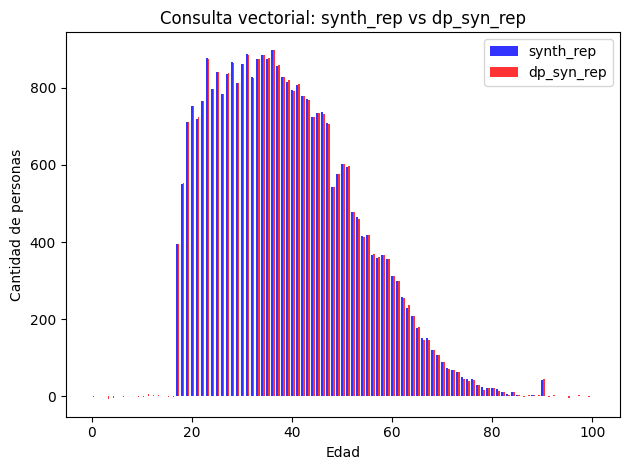

In [8]:
# Crear una figura y un eje para el gráfico de barras
fig, ax = plt.subplots()

# Configurar los datos y los colores de las barras para synth_rep y dp_syn_rep
bar_width = 0.35
opacity = 0.8
rects1 = ax.bar(range(101), synth_rep, bar_width, alpha=opacity, color='b', label='synth_rep')
rects2 = ax.bar([i + bar_width for i in range(101)], dp_syn_rep, bar_width, alpha=opacity, color='r', label='dp_syn_rep')

# Configurar las etiquetas del eje x y el título del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Consulta vectorial: synth_rep vs dp_syn_rep')

# Agregar leyendas y mostrar el gráfico
ax.legend()
fig.tight_layout()
plt.show()

El anterior es un gráfico de barras una al lado de la otra. Tratemos de ponerlo en una misma casilla a ver si se observa mejor:

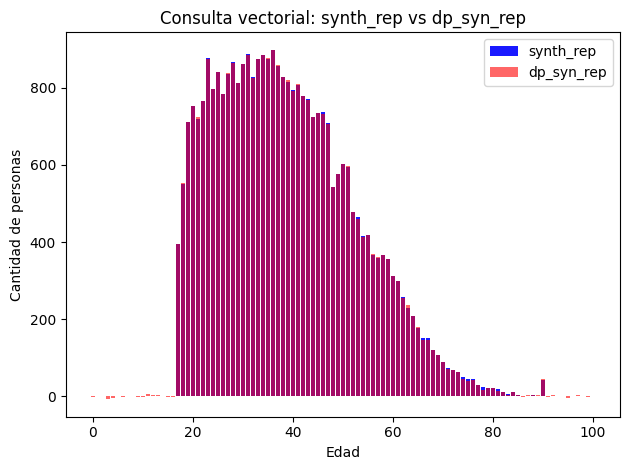

In [9]:
# Crear una figura y un eje para el gráfico de barras
fig, ax = plt.subplots()

# Configurar los datos y los colores de las barras para synth_rep y dp_syn_rep
bar_width = 0.8
x = range(101)
rects1 = ax.bar(x, synth_rep, bar_width, alpha=0.9, color='b', label='synth_rep')
rects2 = ax.bar(x, dp_syn_rep, bar_width,  alpha=0.6, color='r', label='dp_syn_rep')

# Configurar las etiquetas del eje x y el título del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Consulta vectorial: synth_rep vs dp_syn_rep')

# Agregar leyendas y mostrar el gráfico
ax.legend()
fig.tight_layout()
plt.show()


Es posible identificar que la distribución entre synth_rep vs dp_syn_rep es muy similar. Sin embargo, se observan unos valores negativos y cercanos a cero en la gráfica de dp_syn_rep.

# Segunda parte (30%)

1. Debido a la naturaleza del ruido Laplaciano, dp_synth_rep podría tener coordenadas negativas. Procese dp_synth_rep para cambiar todas las coordenadas negativas a 0. Es decir, si
$$\text{dp_synth_rep}=[1.32,0,-2.33,44.4324],$$
entonces después de procesar las coordenadas tendremos
$$\text{dp_synth_rep}=[1.32, 0, 0, 44.4324].$$

**Observación: Este es solo un ejemplo. La verdadera lista dp_synth_rep tendrá 101 elementos.**

2. Normalice dp_synth_rep para que la suma de todas sus coordenadas sumen 1. Llame dp_synth_rep_norm a este objeto.

3. Piense dp_synth_rep_norm como una distribución de probabilidad (la 0-ésima coordenada corresponderá a la probabilidad de obtener la edad 0, la primera coordenada la probabilidad de obtener la probabilidad 1 y así...) y ocúpela para muestrear age_data.shape[0] (la cantidad de filas en age_data) edades entre 0 y 100. Con estas muestras cree un dataframe, que debe llamar dp_synth_data, cuya única columna es 'Age'.
**Observación:** Para muestrear las edades puede usar el método choice del módulo random de numpy. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html


4. Haga un histograma con las edades de age_data y de dp_synth_data (ambos deben estar en un mismo gráfico).

5. Calcule la sensibilidad de la consulta (sobre la base de datos age_data): ¿Cuántas personas tienen entre 0 y 65 años?

6. Realice 100 experimentos de la aplicación del mecanismo Laplaciano a la consulta del punto 5 (nuevamente, la consulta está hecha sobre age_data). Situe estos 100 experimentos en un gráfico que contenga el valor de la consulta sin privatizar y el valor de la consulta hecha sobre dp_synth_data (estos dos valores serán una línea horizontal, mientras que los experimentos serán puntos). ¿Por qué cree que ocurre lo que se ve en el gráfico? 

**Respuestas**

**Punto 1**

In [10]:
for i in range(len(dp_syn_rep)):
    if dp_syn_rep[i] < 0:
        dp_syn_rep[i] = 0

print(dp_syn_rep) 

[0, 0.4799530870645339, 1.0986995923842489, 0, 0, 0.19928193159115565, 0, 0, 0.8342351921735366, 0, 0, 6.275780874195374, 4.007523207441218, 2.548403846672264, 0.9397348758309526, 0, 0, 394.522835904146, 552.5603482739625, 711.9163455947374, 752.7383671146995, 725.4708914612554, 764.8616462613155, 875.6668684642584, 797.4770337887824, 842.2415506841363, 783.76605527117, 838.0865182434612, 865.4170679428563, 811.87406669467, 861.2246643637045, 886.2633309385851, 825.2028639816097, 873.8843823825229, 884.9193547608653, 877.4346132358679, 898.716717863241, 858.5281509109643, 827.7986105927391, 819.3209959686496, 792.1524705406165, 809.1714443010279, 779.4304795490639, 768.2438817911969, 723.7982714477524, 733.7407591505149, 731.820903012597, 706.7080939491271, 543.5402367121, 577.6309737975101, 602.4037476669683, 596.3843749855536, 476.76193458305346, 459.9120387143059, 413.92048052410803, 419.4899806718127, 369.82678890775935, 360.0442206598568, 366.3249812706476, 356.2412790169995, 312.

**Punto 2**

In [11]:
dp_synth_rep_norm_array = dp_syn_rep / np.sum(dp_syn_rep)
np.sum(dp_synth_rep_norm_array)


0.9999999999999999

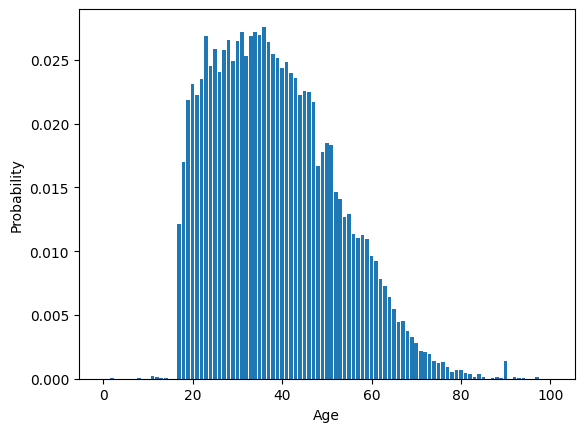

In [12]:
dp_synth_rep_norm = dp_synth_rep_norm_array.tolist()

bins = list(range(101))

plt.xlabel('Age')
plt.ylabel('Probability')
plt.bar(bins, dp_synth_rep_norm);

Podemos observar que la distribución del gráfico de probabilidades es prácticamente igual al del gráfico original. 

**Punto 3**

In [13]:
def gen_samples(n):
  return np.random.choice(bins, n, p=dp_synth_rep_norm)

dp_synth_data = pd.DataFrame(gen_samples(age_data.shape[0]), columns=['Age'])
dp_synth_data

,Age
0,49
1,34
2,47
3,41
4,36
...,...
32556,33
32557,44
32558,38
32559,31


**Punto 4**

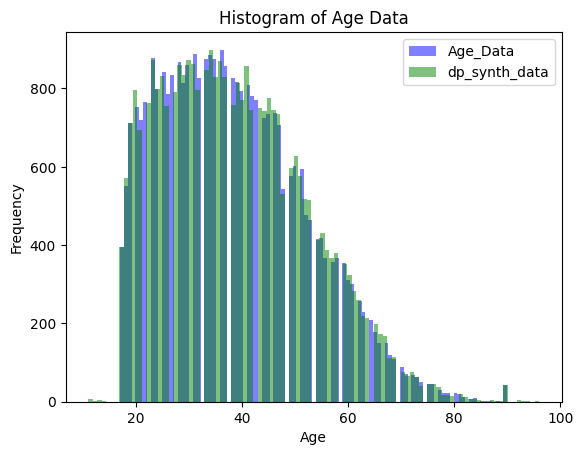

In [14]:
# plot histogram for df1
plt.hist(age_data['Age'], bins=101, alpha=0.5, color='blue', label='Age_Data')

# plot histogram for df2
plt.hist(dp_synth_data['Age'], bins=101, alpha=0.5, color='green', label='dp_synth_data')

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Data')

# add legend
plt.legend(loc='upper right')

# display the plot
plt.show()

**Punto 5**

**Sensibilidad:** Al tratarse de una consulta de conteo, la sensibilidad de la misma es 1. La mayor variación posible entre la base de datos $S$ y una base de datos vecina $S'$ es 1.

In [15]:
#Creamos una función range_query 
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

range_query(age_data, 'Age', 0, 65)

31225

En la base de datos de age_data, tenemos 31.225 personas con edades entre los 0 y los 65 años.

**Punto 6**

In [16]:
bins = list(range(0, 100))
counts = [range_query(dp_synth_data, 'Age', b, b+1) for b in bins]

#Ahora, creamos la función range_query para la base de datos sintética
def range_query_synth(syn_rep, a, b):
    total = 0
    for i in range(a, b):
        total += syn_rep[i]
    return total

In [17]:
#Almacenamos el valor de la consulta en la base de datos original (dp_synth_data)
true_answer = range_query(age_data, 'Age', 0, 65)

In [18]:
#Ahora, almacenamos el valor de la consulta en la base de datos sintetica (age_data)
syn_answer = range_query_synth(counts, 0, 65)

In [19]:
range_query_synth(counts, 0, 65)

31189

In [20]:
# crear una lista vacía para almacenar los resultados de los 100 experimentos
results_true = []

# ejecutar la función laplace_mech 100 veces y almacenar los resultados en la lista
for i in range(100):
    result = laplace_mech(true_answer, 2, epsilon)
    results_true.append(result)

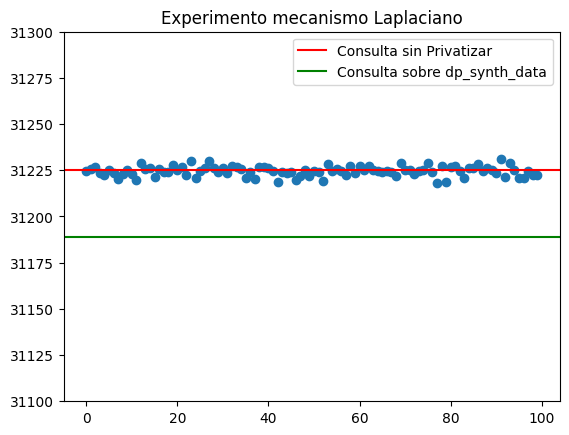

In [21]:
#Ahora el gráfico

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Graficar los valores como puntos
ax.scatter(range(len(results_true)), results_true)

# Graficar la línea correspondiente a true_answer
ax.axhline(y=true_answer, color='r', label='Consulta sin Privatizar')

# Graficar la línea correspondiente a syn_answer
ax.axhline(y=syn_answer, color='g', label='Consulta sobre dp_synth_data')

# Agregar un título y leyenda al gráfico
ax.set_title('Experimento mecanismo Laplaciano')
ax.legend()
# Establecer los límites del eje Y
ax.set_ylim([31100, 31300])


# Mostrar el gráfico
plt.show()


A medida que el rango aumenta, el conteo aumenta, por lo que esperaríamos que el error relativo disminuya. Grupos más grandes significan una señal más fuerte, lo que conduce a un error relativo más bajo. Con el mecanismo de Laplace, vemos exactamente este comportamiento. Sin embargo, con nuestra representación sintética, estamos sumando resultados ruidosos de muchos grupos más pequeños, por lo que a medida que crece la señal, ¡también crece el ruido!.

Esta diferencia demuestra el inconveniente de la representación sintética: puede responder a cualquier consulta de rango sobre el rango que cubre, pero es posible que no ofrezca la misma precisión que el mecanismo de Laplace. La principal ventaja de la representación sintética es la capacidad de responder infinitas consultas sin un presupuesto de privacidad adicional; la principal desventaja es la pérdida de precisión.

La ventaja de la data sintética es que se crea mediante el post-procesamiento de un objeto diferencialmente-privado. Por ende, la data sintética es también diferencialmente-privada (con respecto a la data que se usó para su creación) y tiene el mismo parámetro de privacidad. Esto implica que inmediatamente todas las consultas que hagamos a la data sintética también serán diferencialmente-privadas con el mismo parámetro de privacidad, debido a que no son más que post-procesamiento de ella.

# Tercera parte (50%)

En esta tercera parte hará algo muy similar a lo que hizo en las dos primeras, pero con dos columnas de atributos en lugar de una.

Las dos columnas de atributos (de la misma base de datos entregada) que usará son: las edades (Age) y el empleo (Occupation).

1. Cree una tabla de contingencia (crosstab), llamada synth_rep_2feat, usando las edades y los empleos.
**Observación: Para esta tarea puede usar pd.crosstab().**
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

2. Podemos pensar la tabla de contigencia como una consulta vectorial. Justifique por qué la 1-sensibilidad de esta consulta es 1.

3. Añada ruido Laplaciano con $\varepsilon=1$ a cada uno de los contadores presentes en synth_rep_2feat y procese los contadores ruidosos para que no hayan contadores negativos (o sea, proceselos como en el punto 1. de la **Segunda parte**).

4. Convierta la tabla de contingencia (synth_rep_2feat) en una lista, llamada dp_synth_rep_2feat donde cada elemento es una nueva lista, la cual tendrá tres elementos: una edad, un empleo y la cantidad de personas en la base de datos que tienen esa edad y ese empleo. La lista se vería más o menos así (los valores son inventados):

$$\text{dp_synth_rep_2feat} = [\quad[17, \text{'Adm-Clerical'}, 23.3434], [17, \text{'Armed-Forces'}, 1.23797], \ldots\quad ] $$

5. Usando dp_synth_rep_2feat cree dos nuevas listas: dp_synth_rep_values y counts. dp_synth_rep_values tendrá como elementos listas de dos elementos con los atributos cruzados, mientras que counts tendrá los contadores de estos atributos. Asegúrese de que ambas listas tengan el mismo orden; es decir, si seguimos el mismo ejemplo de antes:

$$\text{dp_synth_rep_values = }[\quad[17, \text{'Adm-Clerical}], [17, \text{'Armed-Forces'},\ldots\quad]$$

$$\text{counts = }[23.3434, 1.23797, \ldots]$$

6. Normalice los valores de counts de manera que la suma de todos los valores sumen en total 1. Llame probs a esta nueva lista.

7. Use probs para muestrear age_data.shape[0] (la cantidad de filas en la base de datos) pares de atributos (cada par de atributos tiene la probabilidad correspondiente a su valor en probs de ocurrir). Use estas muestras para crear un dataframe, que debe llamar dp_synth_data_2feat, cuyas columnas son 'Age' y 'Occupation'.

8. Haga una gráfica que compare los histogramas de las edades de age_data y dp_synth_data_2feat, y otra gráfica que compare los histogramas de dp_synth_data y dp_synth_data_2feat.

9. Añada al gráfico de 6. de la **Segunda parte** el valor de la consulta (representada por una línea horizontal) "¿Cuántas personas tienen entre 0 y 65 años?" hecha sobre dp_synth_data_2feat. ¿Por qué cree que el gráfico se ve así?

**Respuesta**

**Punto 1**

In [22]:
synth_rep_2feat = pd.crosstab(df['Age'], df['Occupation'])
synth_rep_2feat.head()

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Age,,,,,,,,,,,,,,
17,23,0,14,1,9,40,2,129,8,10,3,87,1,3
18,55,0,17,6,14,50,17,152,4,10,5,115,2,8
19,102,0,40,12,24,65,30,166,3,18,3,112,8,16
20,117,0,35,15,23,81,41,139,3,28,9,108,14,24
21,121,0,59,18,25,51,51,142,4,30,7,93,16,14


**Punto 2**

La 1-sensibilidad de varias columnas juntas es 2 porque el cambio máximo en la salida de la función cuando se agrega o elimina un solo registro de la entrada es 2.

Por ejemplo, si la tabla de contingencia muestra que hay 10 gerentes de 18 años y 5 gerentes de 19 años, y agregamos un registro de alguien que es un gerente de 19 años, el conteo en el 18- la columna del gerente de 19 años disminuirá en 1, y el conteo en la columna del gerente de 19 años aumentará en 1. El cambio total en la tabla es 2.

De manera similar, si eliminamos un registro de alguien que es un gerente de 19 años, el conteo en la columna de gerente de 18 años aumentará en 1, y el conteo en la columna de gerente de 19 años de edad disminuirá en 1. El cambio total en la tabla es 2.

La sensibilidad de una tabla de contingencia es importante porque determina la cantidad de ruido que debe agregarse a la tabla para proteger la privacidad de las personas en el conjunto de datos. Cuanto mayor sea la sensibilidad, más ruido se debe agregar.

La misma lógica se aplica a varias columnas. Por ejemplo, si tenemos una tabla de contingencia con tres columnas, la sensibilidad sigue siendo 2. Esto se debe a que el cambio máximo en la tabla se puede lograr agregando o eliminando un registro que cambie el conteo en cualquiera de las celdas por 1.

**Punto 3**

In [23]:
dp_ct = synth_rep_2feat.applymap(lambda x: max(laplace_mech(x, 2, 1), 0))
dp_ct

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Age,,,,,,,,,,,,,,
17,20.836295,0.000000,11.683872,0.000000,8.552314,40.486583,3.078504,128.106667,4.219068,9.971591,1.092069,84.737266,0.000000,4.902315
18,54.722191,0.918218,16.897995,8.588344,16.667700,50.982810,17.235345,148.822828,3.228395,10.774847,3.577451,111.769307,2.471593,8.247963
19,100.140404,0.000000,39.641425,14.062001,24.436639,62.347732,30.317921,156.570066,7.586859,17.860943,1.623499,116.542268,7.276668,17.238695
20,117.556706,0.000000,32.089594,19.888350,21.052882,80.652331,37.151356,138.969982,4.047101,30.739011,8.686232,111.813207,9.593194,23.216309
21,120.873507,3.528782,57.125970,17.494414,23.845041,49.375600,49.843208,139.553882,2.503182,30.041158,6.314563,80.896857,16.812993,14.269667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.896353,0.000000,0.000000,0.000000,5.722768,0.206336,1.526613,2.195522,0.184285,3.925372,0.000000,3.093767,0.000000,1.785650
85,0.000000,0.000000,0.000000,3.574516,0.000000,0.448939,1.284537,1.451501,0.000000,0.000000,1.946358,0.000000,0.968153,0.000000
86,0.000000,0.000000,0.012994,0.000000,13.892519,4.364787,3.826453,2.441134,2.885403,0.000000,0.911255,0.046939,0.207789,0.000000


**Punto 4**

In [24]:
dp_synth_rep_2feat = dp_ct.stack().reset_index().values.tolist()
dp_synth_rep_2feat

[[17, 'Adm-clerical', 20.836295100128513],
 [17, 'Armed-Forces', 0.0],
 [17, 'Craft-repair', 11.683872391567451],
 [17, 'Exec-managerial', 0.0],
 [17, 'Farming-fishing', 8.55231449816026],
 [17, 'Handlers-cleaners', 40.48658307086554],
 [17, 'Machine-op-inspct', 3.0785042117357033],
 [17, 'Other-service', 128.10666658318425],
 [17, 'Priv-house-serv', 4.219067934016135],
 [17, 'Prof-specialty', 9.971590574397913],
 [17, 'Protective-serv', 1.0920692496212339],
 [17, 'Sales', 84.7372659372718],
 [17, 'Tech-support', 0.0],
 [17, 'Transport-moving', 4.902315007860058],
 [18, 'Adm-clerical', 54.72219098866112],
 [18, 'Armed-Forces', 0.9182177471163421],
 [18, 'Craft-repair', 16.89799488822993],
 [18, 'Exec-managerial', 8.588344322827567],
 [18, 'Farming-fishing', 16.667700028134092],
 [18, 'Handlers-cleaners', 50.98281042883386],
 [18, 'Machine-op-inspct', 17.235345036059112],
 [18, 'Other-service', 148.82282823578117],
 [18, 'Priv-house-serv', 3.22839496458923],
 [18, 'Prof-specialty', 10.7

**Punto 5**

In [25]:
dp_synth_rep_values = [[a,b] for a,b,_ in dp_synth_rep_2feat]
dp_synth_rep_values

[[17, 'Adm-clerical'],
 [17, 'Armed-Forces'],
 [17, 'Craft-repair'],
 [17, 'Exec-managerial'],
 [17, 'Farming-fishing'],
 [17, 'Handlers-cleaners'],
 [17, 'Machine-op-inspct'],
 [17, 'Other-service'],
 [17, 'Priv-house-serv'],
 [17, 'Prof-specialty'],
 [17, 'Protective-serv'],
 [17, 'Sales'],
 [17, 'Tech-support'],
 [17, 'Transport-moving'],
 [18, 'Adm-clerical'],
 [18, 'Armed-Forces'],
 [18, 'Craft-repair'],
 [18, 'Exec-managerial'],
 [18, 'Farming-fishing'],
 [18, 'Handlers-cleaners'],
 [18, 'Machine-op-inspct'],
 [18, 'Other-service'],
 [18, 'Priv-house-serv'],
 [18, 'Prof-specialty'],
 [18, 'Protective-serv'],
 [18, 'Sales'],
 [18, 'Tech-support'],
 [18, 'Transport-moving'],
 [19, 'Adm-clerical'],
 [19, 'Armed-Forces'],
 [19, 'Craft-repair'],
 [19, 'Exec-managerial'],
 [19, 'Farming-fishing'],
 [19, 'Handlers-cleaners'],
 [19, 'Machine-op-inspct'],
 [19, 'Other-service'],
 [19, 'Priv-house-serv'],
 [19, 'Prof-specialty'],
 [19, 'Protective-serv'],
 [19, 'Sales'],
 [19, 'Tech-suppor

In [26]:
counts = [p for _,_,p in dp_synth_rep_2feat]
counts

[20.836295100128513,
 0.0,
 11.683872391567451,
 0.0,
 8.55231449816026,
 40.48658307086554,
 3.0785042117357033,
 128.10666658318425,
 4.219067934016135,
 9.971590574397913,
 1.0920692496212339,
 84.7372659372718,
 0.0,
 4.902315007860058,
 54.72219098866112,
 0.9182177471163421,
 16.89799488822993,
 8.588344322827567,
 16.667700028134092,
 50.98281042883386,
 17.235345036059112,
 148.82282823578117,
 3.22839496458923,
 10.77484712046559,
 3.577450776112049,
 111.76930725861041,
 2.4715932184416265,
 8.24796296173924,
 100.14040425064292,
 0.0,
 39.64142503418838,
 14.062001282657647,
 24.43663856605621,
 62.347731961577956,
 30.317920523212795,
 156.5700655437478,
 7.5868589815397485,
 17.860942977821757,
 1.6234989900948573,
 116.54226845372202,
 7.276668251410044,
 17.238695123644828,
 117.55670566770054,
 0.0,
 32.08959446207136,
 19.888350183517616,
 21.052882443803476,
 80.65233078439877,
 37.15135607738777,
 138.96998220323877,
 4.047101475505565,
 30.739010583930497,
 8.686232

**Punto 6**

In [27]:
probs_arr = counts / np.sum(counts)
np.sum(probs_arr)

1.0

In [28]:
probs = probs_arr.tolist()

**Punto 7**

In [29]:
indices = range(0, len(dp_synth_rep_values))
n = laplace_mech(len(df), 2, 1.0)
gen_indices = np.random.choice(indices, int(n), p=probs)
syn_data = [dp_synth_rep_values[i] for i in gen_indices]

dp_synth_data_2feat = pd.DataFrame(syn_data, columns=['Age', 'Occupation'])
dp_synth_data_2feat.head()

,Age,Occupation
0,23,Tech-support
1,36,Sales
2,20,Handlers-cleaners
3,53,Sales
4,40,Sales


**Punto 8**

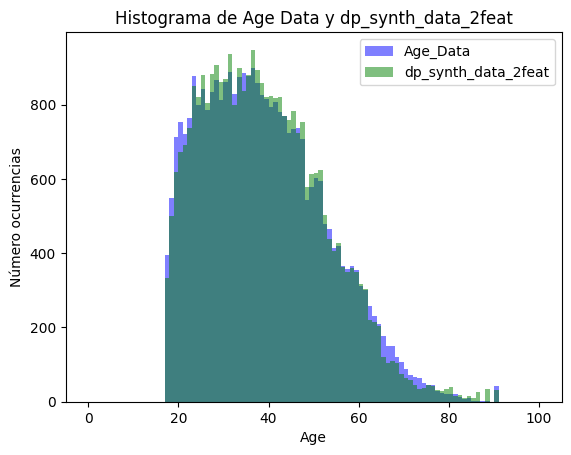

In [30]:
# plot histogram for df1
plt.hist(age_data['Age'], bins=list(range(101)), alpha=0.5, color='blue', label='Age_Data')

# plot histogram for df2
plt.hist(dp_synth_data_2feat['Age'], bins=list(range(101)), alpha=0.5, color='green', label='dp_synth_data_2feat')

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Número ocurrencias')
plt.title('Histograma de Age Data y dp_synth_data_2feat')

# add legend
plt.legend(loc='upper right')

# display the plot
plt.show()

Si bien pareciera que las 2 gráficas siguen la misma distribución, se observa menos uniforme que los datos originales.

**Punto 9**

Haga una gráfica que compare los histogramas de las edades de age_data y dp_synth_data_2feat, y otra gráfica que compare los histogramas de dp_synth_data y dp_synth_data_2feat.

Añada al gráfico de 6. de la Segunda parte el valor de la consulta (representada por una línea horizontal) "¿Cuántas personas tienen entre 0 y 65 años?" hecha sobre dp_synth_data_2feat. ¿Por qué cree que el gráfico se ve así?

In [31]:
dp_synth_data_2feat

,Age,Occupation
0,23,Tech-support
1,36,Sales
2,20,Handlers-cleaners
3,53,Sales
4,40,Sales
...,...,...
32556,34,Craft-repair
32557,38,Sales
32558,21,Other-service
32559,43,Exec-managerial


In [32]:
bins = list(range(0, 100))
counts_2feat = [range_query(dp_synth_data_2feat, 'Age', b, b+1) for b in bins]

In [33]:
syn_answer_2feat = range_query_synth(counts_2feat, 0, 65)
syn_answer_2feat

31433

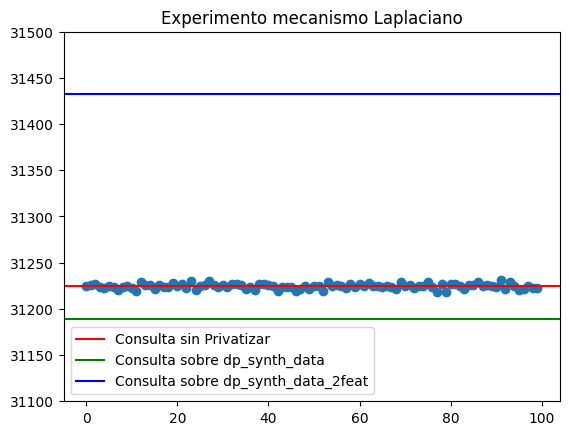

In [34]:
# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Graficar los valores como puntos
ax.scatter(range(len(results_true)), results_true)

# Graficar la línea correspondiente a true_answer
ax.axhline(y=true_answer, color='r', label='Consulta sin Privatizar')

# Graficar la línea correspondiente a syn_answer
ax.axhline(y=syn_answer, color='g', label='Consulta sobre dp_synth_data')

# Graficar la línea correspondiente a dp_synth_data_2feat
ax.axhline(y=syn_answer_2feat, color='b', label='Consulta sobre dp_synth_data_2feat')

# Agregar un título y leyenda al gráfico
ax.set_title('Experimento mecanismo Laplaciano')
ax.legend()
# Establecer los límites del eje Y
ax.set_ylim([31100, 31500])


# Mostrar el gráfico
plt.show()

La desventaja de considerar dos columnas a la vez es que nuestra precisión será menor. A medida que agregamos más columnas al conjunto que estamos considerando (es decir, construimos una marginal $n-way$, con valores crecientes de $n$), vemos el mismo efecto que hicimos con las tablas de contingencia: cada conteo se vuelve más pequeño, por lo que la señal se vuelve más pequeña en relación con el ruido y nuestros resultados no son tan precisos. 

Podemos ver este efecto trazando el histograma de edades en nuestro nuevo conjunto de datos sintéticos `dp_synth_data_2feat`; se observa que tiene aproximadamente la forma correcta, pero es menos uniforme que los datos originales o los recuentos privados diferenciales que usamos para la columna de edad por sí misma.

### Conclusiones

 

*   La representación sintética de un conjunto de datos permite responderconsultas sobre los datos originales
*   Un ejemplo común de una representación sintética es un histograma, que se puede hacer diferencialmente privado agregando ruido a sus conteos.
*   Se puede usar una representación de histograma para generar datos sintéticos con la misma forma que los datos originales al tratar sus conteos como probabilidades: se normalizan los conteos para que sumen 1, luego tome muestras de los contenedores de histogramas usando los conteos normalizados correspondientes como probabilidades
*   Un ejemplo común de una representación sintética es un histograma, que se puede hacer diferencialmente privado agregando ruido a sus conteos.
*   Los marginales $n-ways$ diferencialmente privados se vuelven cada vez más ruidosos a medida que crecen, ya que un $n$ más grande implica un recuento más pequeño para cada contenedor del histograma resultante.





